In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
cohort_all = pd.read_csv("cohort_all_after_entrofy.csv")
cohort_all = cohort_all.drop(['Unnamed: 0'], axis=1)

In [21]:
participants = pd.read_csv("Waterhackweek-2020-Participants-Workshop-On-Water-Data-Science.csv")

### Chart for Global Diversity Targets

In [10]:
def get_counts(col_x, x, filter_name, filter_value):
    if filter_name == 'entrofy_selected' and filter_value is True:
        return len(cohort_all[(cohort_all[col_x] == x) & (cohort_all["entrofy_selected"] == 1)])/len(cohort_all)
    elif filter_name == 'attritionInvite' and filter_value is True:
        return len(cohort_all[(cohort_all[col_x] == x) & (cohort_all["attritionInvite"] == 1)])
    else: 
        return len(cohort_all[(cohort_all[col_x] == x)])/len(cohort_all)

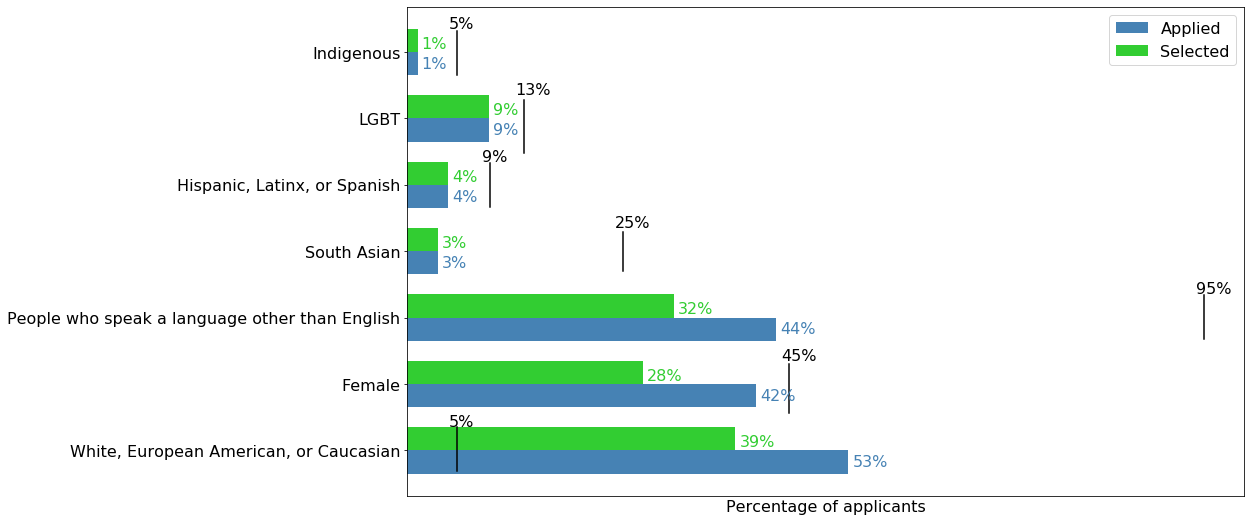

In [67]:
N = 7
applied = [get_counts("race_ethnic", "White, European American, or Caucasian", "entrofy_selected", False),
           get_counts("gender", "Female","entrofy_selected", False),
           get_counts("language" , 0,"entrofy_selected", False),
           get_counts("race_ethnic", "South Asian","entrofy_selected", False),
           get_counts("race_ethnic", "Hispanic, Latinx, or Spanish","entrofy_selected", False),
           get_counts("lgbtq", "Yes","entrofy_selected", False),
           get_counts("race_ethnic", "Indigenous","entrofy_selected", False)
           ]
selected = [get_counts("race_ethnic", "White, European American, or Caucasian","entrofy_selected", True),
           get_counts("gender", "Female","entrofy_selected", True),
           get_counts("language" , 0,"entrofy_selected", True),
           get_counts("race_ethnic", "South Asian","entrofy_selected", True),
           get_counts("race_ethnic", "Hispanic, Latinx, or Spanish","entrofy_selected", True),
           get_counts("lgbtq", "Yes","entrofy_selected", True),
           get_counts("race_ethnic", "Indigenous","entrofy_selected", True)
           ]

sub_section_targets = [0.05, 0.45, 0.95, 0.25, 0.09 ,0.13, 0.05]

y= ['White, European American, or Caucasian', 'Female', 'People who speak a language other than English', 'South Asian', 'Hispanic, Latinx, or Spanish', 'LGBT', 'Indigenous']
# y_pos = [i for i, _ in enumerate(y)]
# fig, ax = plt.subplots()
# rects1 = ax.bar(y_pos, applied, color='green')
plt.rcParams.update({'font.size': 16})
ind = np.arange(N) 
width = 0.35 
plt.figure(figsize=(15,9))
plt.barh(ind, applied, width, label='Applied', color='steelblue')
plt.barh(ind + width, selected, width,
    label='Selected', color='limegreen')

plt.xlabel('Percentage of applicants')
#plt.title('Applied vs Selected')
plt.yticks(ind + width / 2, ('White, European American, or Caucasian', 'Female', 'People who speak a language other than English', 'South Asian', 'Hispanic, Latinx, or Spanish', 'LGBT', 'Indigenous'))
plt.legend(loc='best')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

for i, v in enumerate(applied):
    plt.text(v+0.005, i, str(int(round(v*100,1))) + '%', color='steelblue', va="center")

for i, v in enumerate(selected):
    plt.text(v+0.005, i+0.30, str(int(round(v*100,1))) + '%', color='limegreen', va="center")
    
for i, v in enumerate(sub_section_targets):
    plt.text(v, i+0.60, str(int(round(v*100,1))) + '%', color='black', va="center")

plt.axvline(x=0.06, ymin=0.05, ymax=0.14, color='black')
plt.axvline(x=0.46, ymin=0.17, ymax=0.27, color='black')
plt.axvline(x=0.96, ymin=0.32, ymax=0.41, color='black')
plt.axvline(x=0.26, ymin=0.46, ymax=0.54, color='black')
plt.axvline(x=0.10, ymin=0.59, ymax=0.68, color='black')
plt.axvline(x=0.14, ymin=0.70, ymax=0.81, color='black')
plt.axvline(x=0.06, ymin=0.86, ymax=0.95, color='black')

plt.show()

Applied :
applied in dec 2019 and still want to come for WHW 2020 + the people who apply in the second round

Selected:
who entrofy selects out of the applicant pool defined above

Connector - WHW community (github/hydroshare/papers)
-> applied(2018) + applied(2019) + applied(2020 - 2nd round)

currently- participants of WHW (2018)

### Chart for Learning Objectives

In [23]:
#populate the learning objectives frequency map
learning_objs_map = dict()
for i in range(len(participants)):
    learning_objectives = participants.loc[i,'What are your main learning objectives (please select top 3)?']
    split_objectives = learning_objectives.split(";")
    for obj in split_objectives:
        obj = obj.strip()
        if obj not in learning_objs_map.keys():
            learning_objs_map[obj] = 1
        else :
            learning_objs_map[obj] += 1

In [25]:
learning_objs_prop = dict()
for key in learning_objs_map:
    obj_count = learning_objs_map[key]
    if obj_count > 0:
        learning_objs_prop[key] = obj_count/len(participants)

In [26]:
sorted_learning_objs_prop = {k: v for k, v in sorted(learning_objs_prop.items(), key=lambda item: item[1])}

Text(0.5, 0, 'Percentage of applicants')

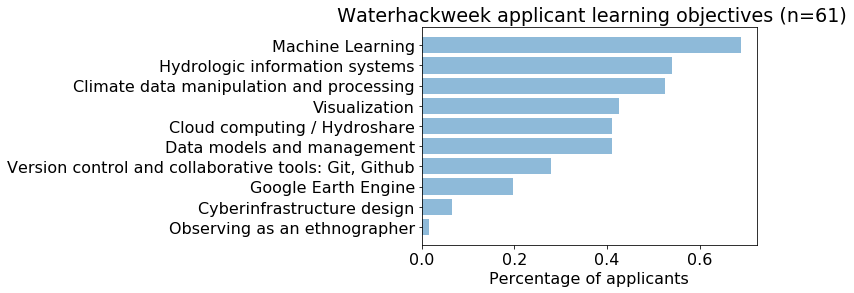

In [29]:
plt.barh(list(sorted_learning_objs_prop.keys()), list(sorted_learning_objs_prop.values()), align='center', alpha=0.5)
plt.title(' Waterhackweek applicant learning objectives (n=61)')
plt.xlabel('Percentage of applicants')

### Chart for Science Domains in Participants

In [60]:
#create a mapping between column names and actual form responses
data_analyzed_map = dict()
data_analyzed_map["Meteorology & Climate"] = "met_climate"
data_analyzed_map["Snow & Ice"] = "snow_ice"
data_analyzed_map["Rivers & Streams"] = "riv_streams"
data_analyzed_map["Lakes & Wetlands"] = "lake_wetlands"
data_analyzed_map["Geomorphology & Sediment"] = "geo_sediment"
data_analyzed_map["Fish & Aquatic Species"] = "fish_aquatic"
data_analyzed_map["Alpine & Forested Environments"] = "alpine_forest"
data_analyzed_map["Urban Environments"] = "urban"
data_analyzed_map["Water Quality & Waste"] = "quality_waste"
data_analyzed_map["Extreme Events & Disaster"] = "extreme_event_disaster"
data_analyzed_map["Data Science & Modeling Software"] = "datasci_model_software"
data_analyzed_map["Population & Public Health Impacts"] = "health"
data_analyzed_map["Channel & Delta Hydraulics"] = "hydraulics"

In [61]:
def populate_data_analyzed_cols():
    other_topics = set()
    for i in range(len(participants)):
        data_analyzed = participants.loc[i, "What kind of data have you analyzed (check all relevant)?"]
        if pd.isnull(data_analyzed):
            print("Data Analyzed is null")
            continue
        split_data = data_analyzed.split(";")
        for data in split_data:
            data = data.strip()
            if data in data_analyzed_map.keys():
                participants.loc[i, data_analyzed_map[data]] = 1
            else:
                other_topics.add(data)
    return other_topics

In [68]:
other_topics = populate_data_analyzed_cols()

In [63]:
sci_domain_prop = dict()
for key in data_analyzed_map:
    sum = np.sum(participants[data_analyzed_map[key]])
    if sum > 0:
        sci_domain_prop[key] = np.sum(participants[data_analyzed_map[key]])/len(participants)

In [64]:
sorted_sci_domain_prop = {k: v for k, v in sorted(sci_domain_prop.items(), key=lambda item: item[1])}

Text(0.5, 0, 'Percentage of applicants')

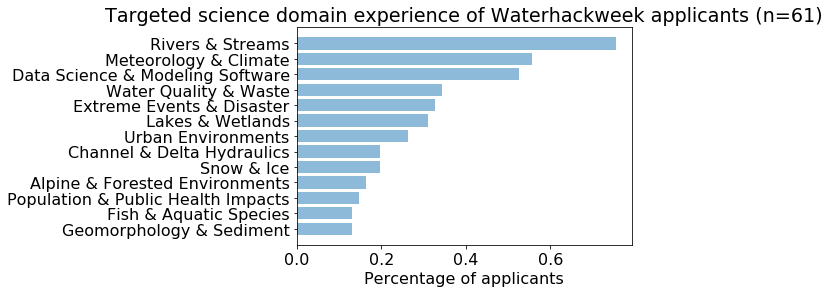

In [65]:
plt.barh(list(sorted_sci_domain_prop.keys()), list(sorted_sci_domain_prop.values()), align='center', alpha=0.5)
plt.title('Targeted science domain experience of Waterhackweek applicants (n=61)')
plt.xlabel('Percentage of applicants')